<a href="https://colab.research.google.com/github/JardelSilva-86/PythonParaAnaliseDeDados/blob/main/Projeto_4_Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de dados de vendas de videogames

Baixar os dados [neste link do Kaggle](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset)

Utilizar o arquivo "PS4_GamesSales.csv"






In [1]:
# Libs Necessárias

# Libs de Modelagem
import pandas as pd
import numpy as np

# Libs de Análises Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings 

# Desabilitando Warnings
warnings.filterwarnings('ignore') 

In [2]:
# Importando dados
dados = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/PythonAnaliseDados/Projetos/PS4_GamesSales.csv', encoding='latin-1')

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimensão
dados.shape

(1034, 9)

In [4]:
# Análise descritiva
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [6]:
# Verificando os campos nulos
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

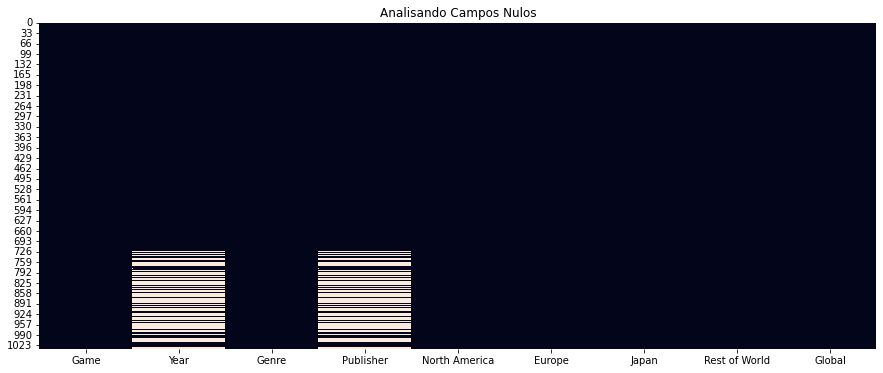

In [7]:
# Campos nulos de forma gráfica
plt.figure( figsize=(15,6) )
plt.title( 'Analisando Campos Nulos' )
sns.heatmap( dados.isnull(), cbar=False );

In [8]:
# Retirando os campos nulos
dados.dropna( inplace=True )

dados.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [9]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


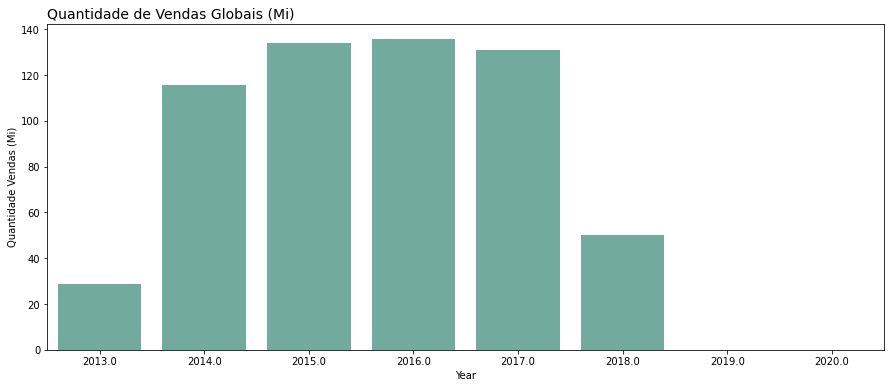

In [10]:
# Tamanho imagem
plt.figure( figsize=(15,6) )

# Título
plt.title( 'Quantidade de Vendas Globais (Mi)', loc='left', fontsize=14 )

# Gráfico
sns.barplot( data=dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum )

# Label (Categoria)
plt.ylabel( 'Quantidade Vendas (Mi)' );

In [11]:
# Retirar os anos de 2019, 2020
dados.loc[ ( dados['Year'] != 2019 ) & ( dados['Year'] != 2020 ) ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [13]:
# Verificando os valores únicos da coluna Year
dados = dados.loc[ ( dados['Year'] != 2019 ) & (dados['Year'] != 2020 ) ]

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


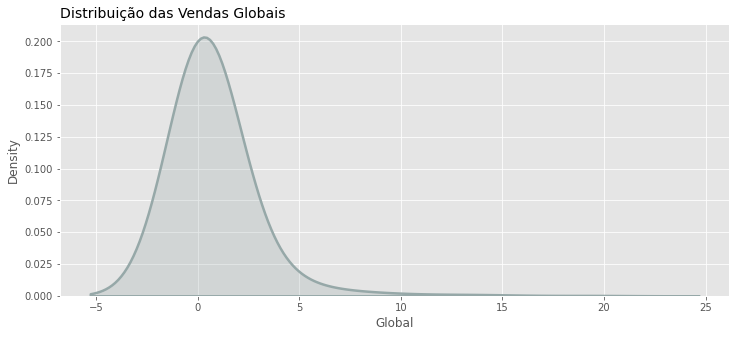

In [15]:
# Tamanho da plotagem
plt.figure( figsize=(12,5) )

# Estilo
plt .style.use('ggplot')

# Título
plt.title( "Distribuição das Vendas Globais", loc='left', fontsize=14 )

# Plotagem
sns.kdeplot( dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );